<a href="https://colab.research.google.com/github/ashishawasthi/interpretability-perf/blob/main/indie/notebooks/SHAP_MLFlow_Breast_Cancer_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q mlflow shap 

In [ ]:
import os
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

import shap
import mlflow
import mlflow.sklearn

## Build Model

In [ ]:
X_all, y_all = load_breast_cancer(return_X_y=True, as_frame=True)
model = RandomForestClassifier()
model.fit(X_all.values, y_all.values)
X_all.shape

(569, 30)

# Explain with set of 10

In [ ]:
X = X_all.iloc[:10, :]
X.shape

(10, 30)

## Generate and log the Explainations

In [ ]:
import warnings
warnings.filterwarnings("ignore") 

with mlflow.start_run() as mlflow_run:
    mlflow.shap.log_explanation(lambda X: model.predict_proba(X)[:, 1], X)

    # Find the atifact path for current run
    mlflow_client = mlflow.tracking.MlflowClient()
    artifact_dir = mlflow_client.list_artifacts(mlflow_run.info.run_id)[0].path
    artifacts = mlflow_client.list_artifacts(mlflow_run.info.run_id, artifact_dir)
    print("Artifact Files:", [art.path for art in artifacts])
    artifact_dir_path = os.path.join(mlflow_run.info.artifact_uri.replace("file://", ""), artifact_dir)
    #artifact_dir_path = mlflow_client.download_artifacts(mlflow_run.info.run_id, artifact_dir)
    print("Artifact Path:", artifact_dir_path)
    mlflow.end_run()

  0%|          | 0/10 [00:00<?, ?it/s]

Artifact Files: ['model_explanations_shap/base_values.npy', 'model_explanations_shap/shap_values.npy', 'model_explanations_shap/summary_bar_plot.png']
Artifact Path: /content/mlruns/0/b854b23edead4e98997af37a59a3b587/artifacts/model_explanations_shap


### Load values from numpy files and show a force plot

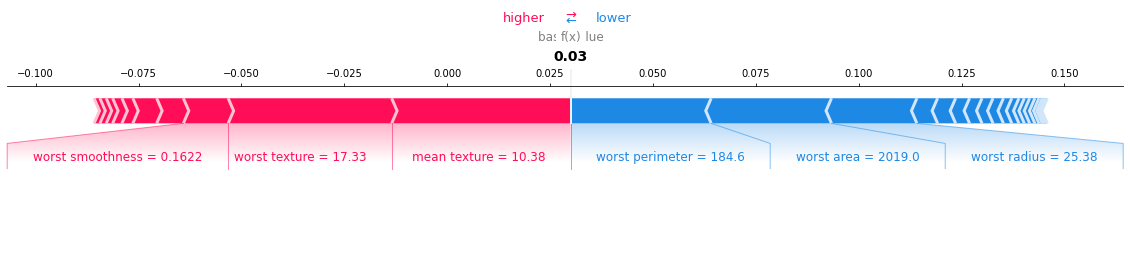

In [ ]:
base_values = np.load(os.path.join(artifact_dir_path, "base_values.npy"))
shap_values = np.load(os.path.join(artifact_dir_path, "shap_values.npy"))
shap.force_plot(float(base_values), shap_values[0, :], X.iloc[0, :], matplotlib=True)

### Load and show summary image

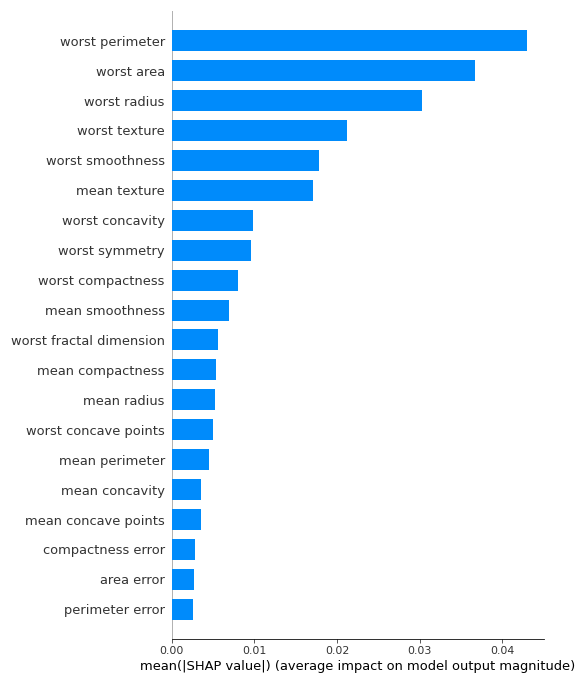

In [ ]:
from IPython.display import display
from PIL import Image
display(Image.open((os.path.join(artifact_dir_path, "summary_bar_plot.png"))))

# Explain with set of 100

In [ ]:
X = X_all.iloc[:100, :]
X.shape

(100, 30)

In [ ]:
import warnings
warnings.filterwarnings("ignore") 

with mlflow.start_run() as mlflow_run:
    mlflow.shap.log_explanation(lambda X: model.predict_proba(X)[:, 1], X)

    # Find the atifact path for current run
    mlflow_client = mlflow.tracking.MlflowClient()
    artifact_dir = mlflow_client.list_artifacts(mlflow_run.info.run_id)[0].path
    artifacts = mlflow_client.list_artifacts(mlflow_run.info.run_id, artifact_dir)
    print("Artifact Files:", [art.path for art in artifacts])
    artifact_dir_path = os.path.join(mlflow_run.info.artifact_uri.replace("file://", ""), artifact_dir)
    #artifact_dir_path = mlflow_client.download_artifacts(mlflow_run.info.run_id, artifact_dir)
    print("Artifact Path:", artifact_dir_path)
    mlflow.end_run()

  0%|          | 0/100 [00:00<?, ?it/s]

Artifact Files: ['model_explanations_shap/base_values.npy', 'model_explanations_shap/shap_values.npy', 'model_explanations_shap/summary_bar_plot.png']
Artifact Path: /content/mlruns/0/9567555b03744ab7b16c0f10675734df/artifacts/model_explanations_shap


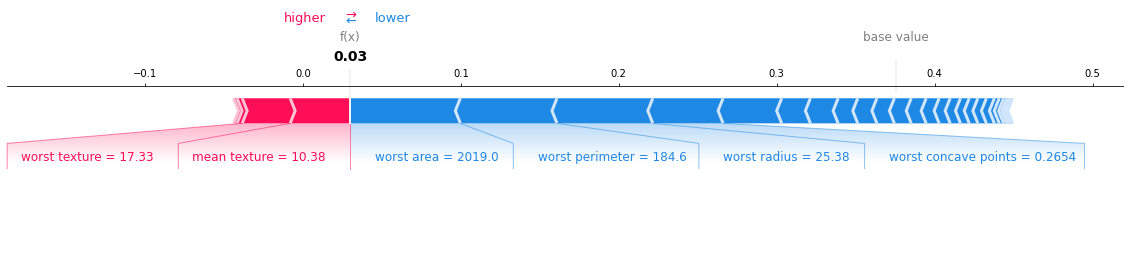

In [ ]:
base_values = np.load(os.path.join(artifact_dir_path, "base_values.npy"))
shap_values = np.load(os.path.join(artifact_dir_path, "shap_values.npy"))
shap.force_plot(float(base_values), shap_values[0, :], X.iloc[0, :], matplotlib=True)

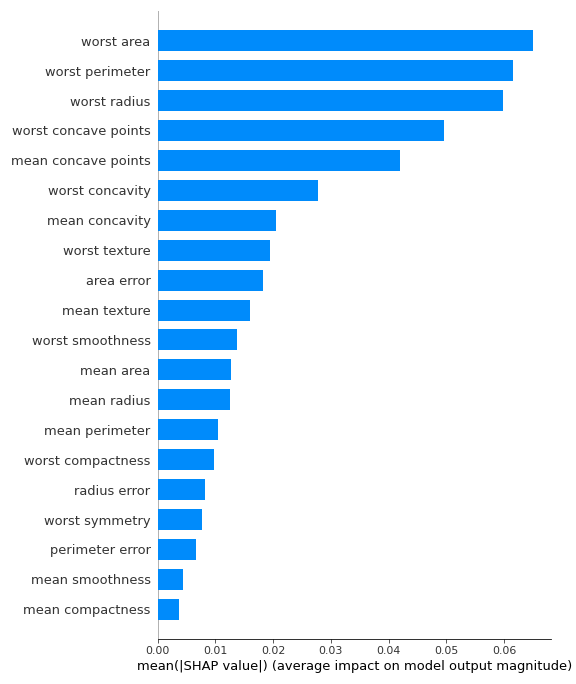

In [ ]:
from IPython.display import display
from PIL import Image
display(Image.open((os.path.join(artifact_dir_path, "summary_bar_plot.png"))))

# Explain with all

In [ ]:
X = X_all
X.shape

(569, 30)

In [ ]:
import warnings
warnings.filterwarnings("ignore") 

with mlflow.start_run() as mlflow_run:
    mlflow.shap.log_explanation(lambda X: model.predict_proba(X)[:, 1], X)

    # Find the atifact path for current run
    mlflow_client = mlflow.tracking.MlflowClient()
    artifact_dir = mlflow_client.list_artifacts(mlflow_run.info.run_id)[0].path
    artifacts = mlflow_client.list_artifacts(mlflow_run.info.run_id, artifact_dir)
    print("Artifact Files:", [art.path for art in artifacts])
    artifact_dir_path = os.path.join(mlflow_run.info.artifact_uri.replace("file://", ""), artifact_dir)
    #artifact_dir_path = mlflow_client.download_artifacts(mlflow_run.info.run_id, artifact_dir)
    print("Artifact Path:", artifact_dir_path)
    mlflow.end_run()

  0%|          | 0/569 [00:00<?, ?it/s]

Artifact Files: ['model_explanations_shap/base_values.npy', 'model_explanations_shap/shap_values.npy', 'model_explanations_shap/summary_bar_plot.png']
Artifact Path: /content/mlruns/0/21b93b96988a4ca394e6a2200dc70f06/artifacts/model_explanations_shap


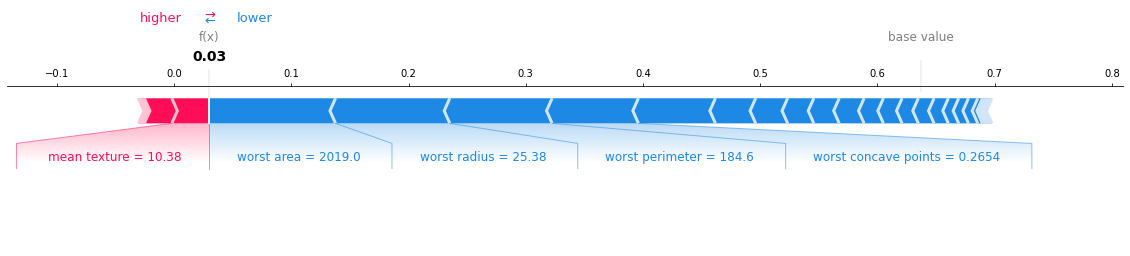

In [ ]:
base_values = np.load(os.path.join(artifact_dir_path, "base_values.npy"))
shap_values = np.load(os.path.join(artifact_dir_path, "shap_values.npy"))
shap.force_plot(float(base_values), shap_values[0, :], X.iloc[0, :], matplotlib=True)

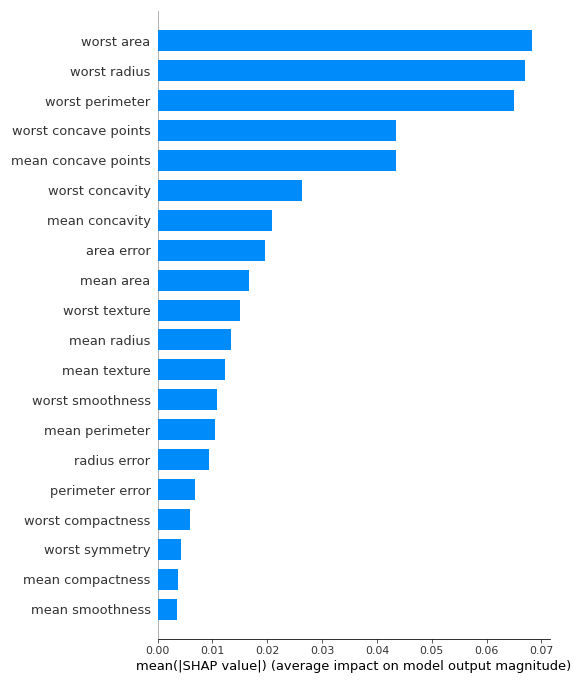

In [ ]:
from IPython.display import display
from PIL import Image
display(Image.open((os.path.join(artifact_dir_path, "summary_bar_plot.png"))))